In [25]:
# Clustering/Dimensionality Reduction
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# DataScience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import data
file_path = ('Resources/Myopia.csv')
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
#  Drop column
df.drop(columns=["MYOPIC"], inplace=True)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


In [8]:
# Standardize the dataset 

# Create a scaler to standardize the data
scaler = StandardScaler()

# Train the scaler with the data.
X_scaled = scaler.fit_transform(df)

In [9]:
# Perform dimensionality reduction with PCA. How did the number of the features change?
# Initialize PCA model preserving 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.9)

# Get the principal components for the X_train_scaled
myopia_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [26]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)

#Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.010s...
[t-SNE] Computed neighbors for 618 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.233932
[t-SNE] KL divergence after 2500 iterations: 2.078097


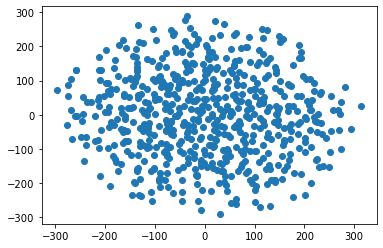

In [14]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(tsne_features[:,0],tsne_features[:,1])

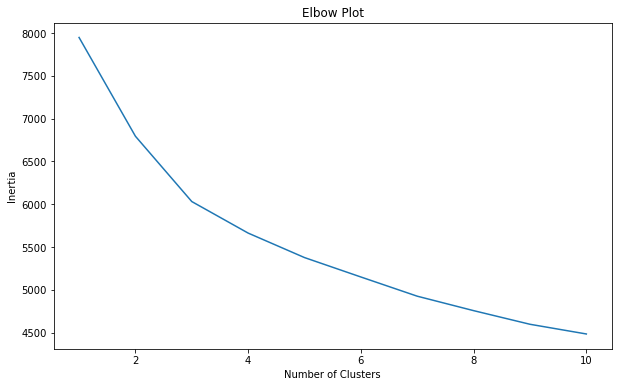

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


In [21]:
# Create an elbow plot to identify the best number of clusters. Make sure to do the following:

# Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)
    
# make plot
plt.figure(figsize=(10,6))

plt.plot(k, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

plt.show()

# If possible, determine where the elbow of the plot is, and at which value of k it appears.
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

In [23]:
# Create a DataFrame from the PCA transformed data for K-Means
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
pca_df = pd.DataFrame(myopia_pca, columns=columns)
pca_df['class']= km.labels_
pca_df.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,6
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


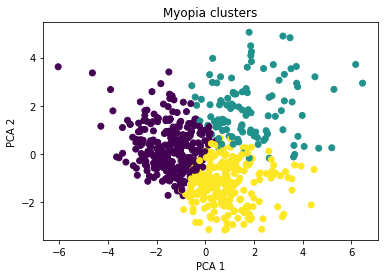

In [27]:
# Initialize the K-Means model with n_clusters 3
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Add predicted clusters (labels) to DataFrame
pca_df['class'] = model.labels_

# Plot the Clusters
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()

The PCA model does a good job of capturing the structure of the data and can be used to generate precise predictions or spot trends in the data. Yet no distinct clusters were seen when dimensionality reduction with t-SNE was attempted. The best visualization technique for seeing 3 separate clusters in the data was cluster analysis with K-means. As a result, it is advised that patients be divided into three separate groups using the K-means method.